In [3]:
from keras.datasets import imdb

# 데이터셋 로드하기
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [4]:
print(f'0 번째 훈련 데이터 : {train_data[0]}')
print(f'0 번째 훈련 데이터의 반응 : {train_labels[0]}')

0 번째 훈련 데이터 : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
0 번째 훈련 데이터의 반응 : 1


In [5]:
word_index = imdb.get_word_index() # 데이터 셋에서 제공하는 단어 인덱스
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # 제공되는 인덱스는 (단어, 정수)이므로 (정수, 단어) 형태로 뒤집어줌
# 리뷰를 디코딩함
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # 0, 1, 2는 'padding', 'start of sequence', 'unknown'이므로 제외하고 디코딩함
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듦
    results = np.zeros((len(sequences), dimension)) # (25000, 10000) 데이터 셋이 됌
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듦
    return results

# 훈련 데이터를 벡터로 변환함
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환함
x_test = vectorize_sequences(test_data)

# label은 타입만 float32로 변환해주면 됌
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(f'one-hot encoding을 적용한 x_train[0] 데이터 : {x_train[0]}')
print(f'one-hot encoding을 적용한 y_train[0] 데이터 : {y_train[0]}')

one-hot encoding을 적용한 x_train[0] 데이터 : [0. 1. 1. ... 0. 0. 0.]
one-hot encoding을 적용한 y_train[0] 데이터 : 1.0


In [7]:
# 모델 정의
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # 입력 데이터는 10,000차원, 10,000차원을 16차원으로 바꾸는 층
model.add(layers.Dense(16, activation='relu')) # input_shape는 앞서 층에 맞춰 자동적으로 기입됌
model.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일
# 각 매개변수를 객체로 만들어 전달도 가능함
model.compile(optimizer='rmsprop',           
              loss='binary_crossentropy',   
              metrics=['accuracy'])         

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
x_train[0].shape

(10000,)

In [10]:
# 검증 세트 만들기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,          # 전체 데이터를 20번 훈련한다는 의미
                    batch_size=512,     # 데이터 셋을 512개로 나눠서 한다는 의미 (개인 사양에 맞춰 설정)
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 27ms/step - loss: 0.5185 - accuracy: 0.7866 - val_loss: 0.3919 - val_accuracy: 0.8722
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3127 - accuracy: 0.8992 - val_loss: 0.3081 - val_accuracy: 0.8899
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2284 - accuracy: 0.9291 - val_loss: 0.2808 - val_accuracy: 0.8914
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1788 - accuracy: 0.9423 - val_loss: 0.2749 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1414 - accuracy: 0.9557 - val_loss: 0.2942 - val_accuracy: 0.8836
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1156 - accuracy: 0.9646 - val_loss: 0.2942 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0924 - accuracy: 0.9735 - val_loss: 0.3145 - val_accuracy: 0.8853
Epoch 8/20
30

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

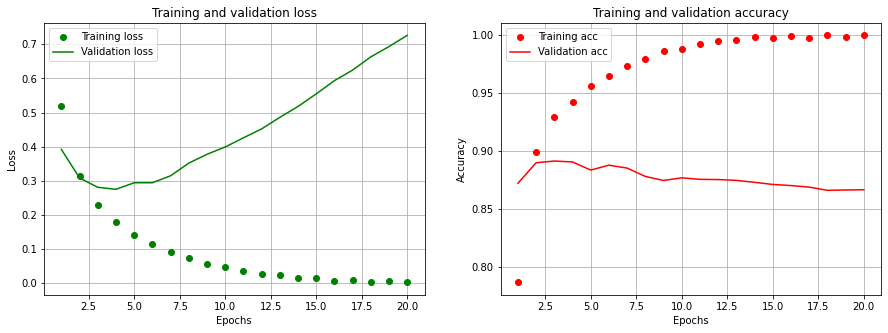

In [13]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure(figsize=(15,5))

# loss
axs_loss = plt.subplot(121)
axs_loss.plot(epochs, loss, 'go', label='Training loss')
axs_loss.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# acc
axs_acc = plt.subplot(122)
axs_acc.plot(epochs, acc, 'ro', label='Training acc')
axs_acc.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

In [14]:
# 모델 수정
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4501 - accuracy: 0.8271
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2615 - accuracy: 0.9096
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2017 - accuracy: 0.9284
Epoch 4/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1681 - accuracy: 0.9405


In [15]:
results = model.evaluate(x_test, y_test) # test 데이터를 사용해 평가함
print(f'평가 결과 {results}')

782/782 [==============================] - 2s 2ms/step - loss: 0.2963 - accuracy: 0.8829
평가 결과 [0.29630473256111145, 0.8829200267791748]


In [18]:
# 테스트 데이터로 예측한 결과 그리기 
predict = model.predict(x_test)
predict_plot = predict[:100] # 100개만 잘라서 확인

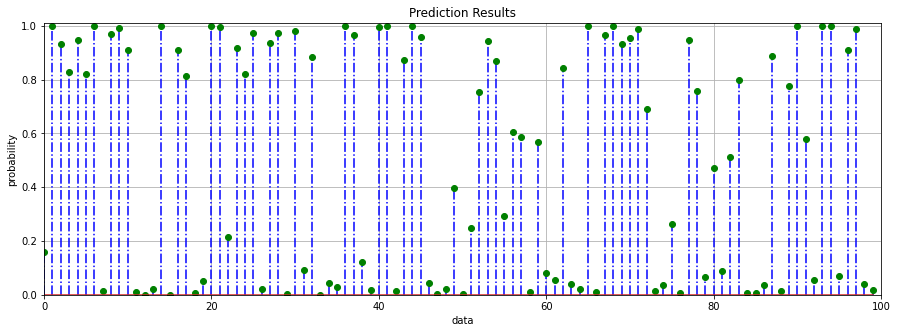

In [33]:
plt.figure(figsize=(15,5))
plt.title('Prediction Results')
plt.stem(range(0,100), predict_plot, 'b-.', 'go')
plt.xlim([0,100]); plt.ylim([0, 1.01])
plt.xlabel('data'); plt.ylabel('probability')
plt.grid(True)
plt.show()